In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import random

In [2]:
USE_CUDA  = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습힙니다 : ", device)

다음 기기로 학습힙니다 :  cpu


In [3]:
training_epochs = 15
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform=transforms.ToTensor(), download = True)
'''
첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로입니다. 
두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받습니다. 
세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해줍니다. 
네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미입니다.
'''
mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform=transforms.ToTensor(), download = True)

In [5]:
data_loader = DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True,drop_last = True)
"""
첫번째 인자인 DataLoader는 로드할 대상을 의미하며, 
두번째 인자인 batch_size는 배치 크기, 
shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부, 
drop_last는 마지막 배치를 버릴 것인지를 의미합니다.
"""

'\n첫번째 인자인 DataLoader는 로드할 대상을 의미하며, \n두번째 인자인 batch_size는 배치 크기, \nshuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부, \ndrop_last는 마지막 배치를 버릴 것인지를 의미합니다.\n'

In [6]:
linear = nn.Linear(784, 10, bias = True)
#bias는 편향 b를 사용할 것인지를 나타냅니다.
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [7]:
for epoch in range(training_epochs):
    avg_cost = 0
    for idx, samples in enumerate(data_loader):
        X, Y = samples
        X = X.view(-1, 28*28)
        prediction = linear(X)
        cost = F.cross_entropy(prediction, Y)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        avg_cost += cost / len(data_loader)
    print("epoch : ", epoch, "cost : ", avg_cost)
        

epoch :  0 cost :  tensor(0.5363, grad_fn=<AddBackward0>)
epoch :  1 cost :  tensor(0.3591, grad_fn=<AddBackward0>)
epoch :  2 cost :  tensor(0.3306, grad_fn=<AddBackward0>)
epoch :  3 cost :  tensor(0.3163, grad_fn=<AddBackward0>)
epoch :  4 cost :  tensor(0.3070, grad_fn=<AddBackward0>)
epoch :  5 cost :  tensor(0.2999, grad_fn=<AddBackward0>)
epoch :  6 cost :  tensor(0.2948, grad_fn=<AddBackward0>)
epoch :  7 cost :  tensor(0.2907, grad_fn=<AddBackward0>)
epoch :  8 cost :  tensor(0.2870, grad_fn=<AddBackward0>)
epoch :  9 cost :  tensor(0.2843, grad_fn=<AddBackward0>)
epoch :  10 cost :  tensor(0.2816, grad_fn=<AddBackward0>)
epoch :  11 cost :  tensor(0.2793, grad_fn=<AddBackward0>)
epoch :  12 cost :  tensor(0.2777, grad_fn=<AddBackward0>)
epoch :  13 cost :  tensor(0.2759, grad_fn=<AddBackward0>)
epoch :  14 cost :  tensor(0.2744, grad_fn=<AddBackward0>)


In [48]:
X_test = mnist_test.test_data.view(-1, 28*28).float()
Y_test = mnist_test.test_labels

prediction = linear(X_test)
correct_prediction = torch.argmax(prediction, 1) == Y_test
accuarcy = correct_prediction.float().mean()
print(accuarcy)

tensor(0.8695)


Label :  tensor(2)
Prediction :  tensor(2)


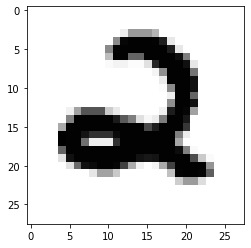

In [14]:
random.seed(0)
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r].view(-1, 28 * 28).float()
Y_singile_data = mnist_test.test_labels[r]
X_single_data_prediction = torch.argmax(linear(X_single_data))

print("Label : ", Y_singile_data)
print("Prediction : ", X_single_data_prediction)

plt.imshow(mnist_test.test_data[r].view(28, 28), cmap = 'Greys', interpolation='nearest')
plt.show()